In [16]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error as mse
from statsmodels.tsa.statespace.sarimax import SARIMAX

import matplotlib.pyplot as plt
import plotly.graph_objs as go

from pylab import rcParams
rcParams['figure.figsize'] = 15, 11
    

In [ ]:
import pickle

with open('learned_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [6]:
df = pd.read_csv(r'data\final_data_predict.csv', index_col=0)
df1 = df['BEER_PROD'].to_frame()
df_train, df_test = df1.iloc[:round(len(df1)*0.9), :], df1.iloc[round(len(df1)*0.9): , :]

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            BEER_PROD   No. Observations:                  357
Model:             SARIMAX(3, 1, 12)x(0, 1, [], 12)   Log Likelihood               -1267.007
Date:                              Sun, 20 Dec 2020   AIC                           2566.015
Time:                                      19:48:41   BIC                           2627.465
Sample:                                  01-01-1985   HQIC                          2590.490
                                       - 09-01-2014                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8472      0.075    -11.335      0.000      -0.994      -0.701
ar.L2         -0.7473      0.088     -8.481      0.000      -0.920      -0.575
ar.L3         -0.3591      0.077     -4.679      0.000      -0.509      -0.209
ma.L1         -0.0622      0.072     -0.867      0.386      -0.203       0.078
ma.L2         -0.1097      0.059     -1.869      0.062      -0.225       0.005
ma.L3         -0.3047      0.054     -5.675      0.000      -0.410      -0.199
ma.L4         -0.3949      0.072     -5.489      0.000      -0.536      -0.254
ma.L5          0.1023      0.051      2.021      0.043       0.003       0.201
ma.L6          0.1428      0.051      2.775      0.006       0.042       0.244
ma.L7         -0.0880      0.052     -1.684      0.092      -0.190       0.014
ma.L8          0.0669      0.047      1.428      0.153      -0.025       0.159
ma.L9          0.0545      0.049      1.110      0.267      -0.042       0.151
ma.L10        -0.0031      0.053     -0.059      0.953      -0.106       0.100
ma.L11         0.2943      0.042      7.030      0.000       0.212       0.376
ma.L12        -0.6436      0.057    -11.304      0.000      -0.755      -0.532
sigma2        87.2919      5.676     15.380      0.000      76.168      98.416
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                61.42
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               5.29   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

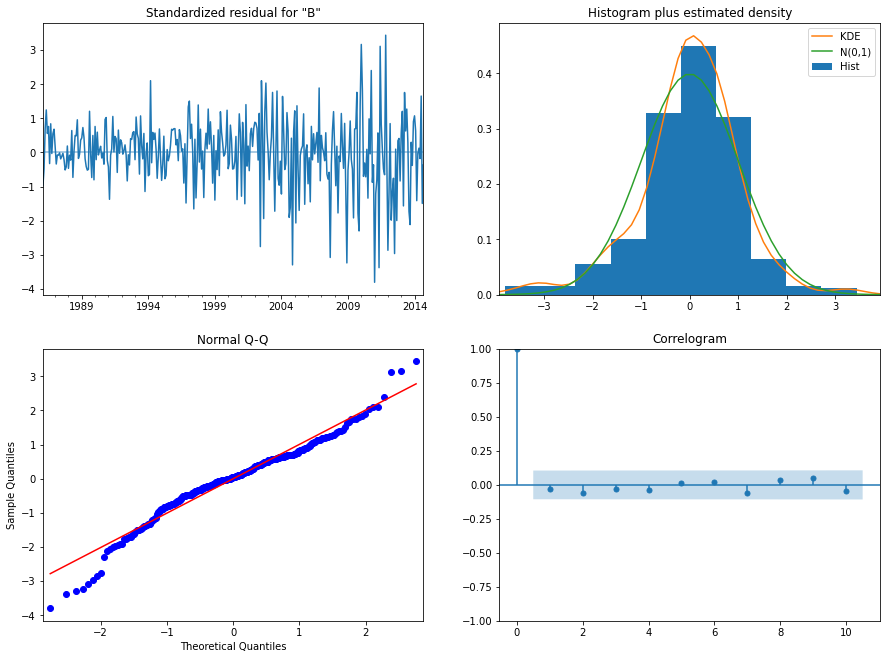

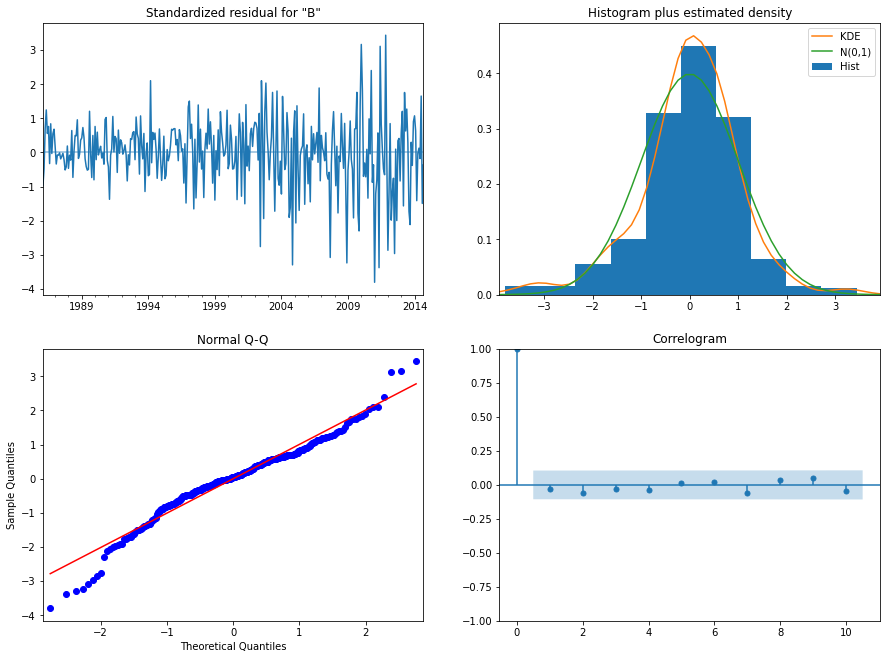

In [9]:
model.plot_diagnostics()

In [11]:
df_train['sarima_fitted'] = model.fittedvalues
df_train

,BEER_PROD,sarima_fitted
DATE,,
1985-01-01,93.2,0.000000
1985-02-01,96.0,93.193659
1985-03-01,95.2,95.998959
1985-04-01,77.1,95.201213
1985-05-01,70.9,77.101636
...,...,...
2014-05-01,144.7,143.515266
2014-06-01,123.6,125.270948
2014-07-01,151.6,136.137571


In [12]:
pred = model.predict(start =df_test.index[0], end = df_test.index[-1])
pred

2014-10-01    167.224378
2014-11-01    185.216396
2014-12-01    204.065768
2015-01-01    165.916031
2015-02-01    141.013190
2015-03-01    156.687278
2015-04-01    150.073225
2015-05-01    139.514804
2015-06-01    128.842480
2015-07-01    142.312654
2015-08-01    139.595932
2015-09-01    139.705230
2015-10-01    166.422495
2015-11-01    184.200762
2015-12-01    206.770653
2016-01-01    166.744232
2016-02-01    140.727767
2016-03-01    157.411857
2016-04-01    151.448178
2016-05-01    139.983845
2016-06-01    129.230343
2016-07-01    143.212749
2016-08-01    140.448003
2016-09-01    140.244347
2016-10-01    167.078714
2016-11-01    185.008884
2016-12-01    207.474942
2017-01-01    167.380926
2017-02-01    141.444779
2017-03-01    158.148619
2017-04-01    152.132457
2017-05-01    140.668990
2017-06-01    129.946883
2017-07-01    143.920889
2017-08-01    141.139488
2017-09-01    140.944946
2017-10-01    167.787054
2017-11-01    185.709835
2017-12-01    208.173096
2018-01-01    168.084192


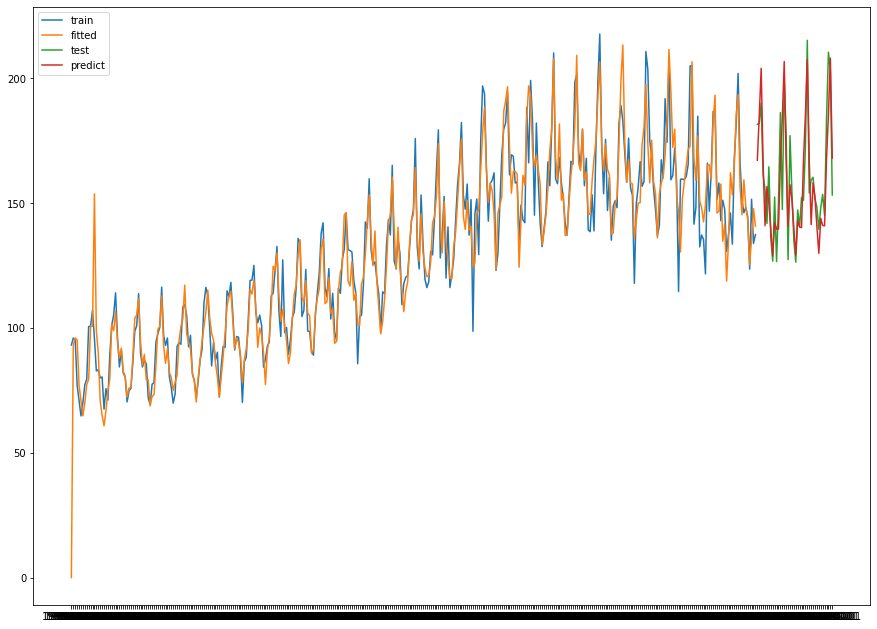

In [13]:
plt.plot(df_train.index, df_train['BEER_PROD'], label='train')

plt.plot(df_train.index, df_train['sarima_fitted'], label='fitted')
plt.plot(df_test.index, df_test['BEER_PROD'], label='test')
plt.plot(df_test.index, pred, label='predict')
plt.legend(loc="upper left")
plt.show()

In [14]:
np.sqrt(mse(pred.values, df_test['BEER_PROD']))  

12.806818667893447

In [31]:
trace0 = go.Scatter(
        x=df_train.index, y=df_train['BEER_PROD'], name= 'train part', marker ={'color': 'blue'}
            )

trace1 = go.Scatter(
        x=df_train.index, y= df_train['sarima_fitted'], name='fitted part'
    )

trace2 = go.Scatter(
        x=df_test.index, y=df_test['BEER_PROD'], name= 'test', marker ={'color': 'blue'}
    )

trace3 = go.Scatter(
        x=df_test.index, y=pred, name= 'predict', marker ={'color': 'green'}
    )

data= [trace0, trace1, trace2, trace3]
    # data =[]
layout = go.Layout(
        title="Graph",
        height=700,
    )

fig = go.Figure(data=data, layout=layout)

#fig.update_xaxes(rangeslider_visible=True)

fig.update_layout(
        xaxis_title="Time",
        yaxis_title="Value",
        #template='plotly_dark'
)
fig

In [33]:
df2_train_, df2_test_ = df_train['BEER_PROD'].to_frame(), df_test['BEER_PROD'].to_frame()
df2_train_['sarima_fitted'] = model.fittedvalues

pred = model.predict(start =df2_test_.index[0], end = df2_test_.index[-1])

def plt3():
    trace0 = go.Scatter(
        x=df2_train_.index, y=df2_train_['BEER_PROD'], name= 'train part', marker ={'color': 'blue'}
            )

    trace1 = go.Scatter(
            x=df2_train_.index, y= df2_train_['sarima_fitted'], name='fitted part'
        )

    trace2 = go.Scatter(
            x=df2_test_.index, y=df2_test_['BEER_PROD'], name= 'test', marker ={'color': 'blue'}
        )

    trace3 = go.Scatter(
            x=df2_test_.index, y=pred, name= 'predict', marker ={'color': 'green'}
        )

    data= [trace0, trace1, trace2, trace3]
        # data =[]
    layout = go.Layout(
            title="Graph",
            height=700,
        )

    fig = go.Figure(data=data, layout=layout)

    #fig.update_xaxes(rangeslider_visible=True)

    fig.update_layout(
            xaxis_title="Time",
            yaxis_title="Value",
            #template='plotly_dark'
    )
    return fig

    
plt3()    